In [1]:
import re

# Ange sökvägen till din textfil pichi.txt
pikachu1_path = "../data/pikachu1.txt"  

# Öppna och läs in textfilen
with open(pikachu1_path, "r") as file:
    raw_text = file.read()

# Skriv ut den råa texten
print(raw_text)

# Fixa mellanslag i texten
text_fixed_spacing = re.sub(r"\s+", " ", raw_text)

# Kaptalisera varje mening och splitta dem
text_list = [text.capitalize() for text in text_fixed_spacing.split(". ")]

# Sammanfoga meningarna med nya rader
cleaned_text = ".\n".join(text_list)

# Skriv ut den rensade texten
print()
print(cleaned_text)

# Öppna en ny txt-fil och skriv innehållet i cleaned_text
with open("../data/cleaned_pikachu1.txt", "w") as file:
    file.write(cleaned_text)

(18.137772263313835, 44.951493566608946)
(26.648661832322336, 41.49878057639454)
(26.180524428318897, 39.38100083914504)
(24.44364396490554, 40.175758410355904)
(21.201902279430513, 36.21004195868266)
(25.691541582957697, 37.24697337031557)
(19.338626083150515, 38.38085562147455)
(23.21718300802926, 40.88308718457233)
(23.444684475950478, 37.30114732596577)
(29.445791130252964, 37.20217384451559)
(28.51023528453833, 35.709930860090324)
(21.16066860901309, 41.31102957270099)
(24.00703335660358, 37.28941783811155)
(20.143822566361578, 44.054200130061275)
(28.951534072137846, 43.59635400253747)
(28.4462228380412, 35.70857349888654)
(21.581337497383593, 37.380046343689955)
(25.66739393839206, 41.68977778296281)
(25.30764253725807, 37.14236807370439)
(19.834071222595618, 36.32311848725025)
(27.150129600901813, 44.35514240580671)
(24.472548361435507, 40.710430933252844)
(27.3435177435667, 39.726710263117944)
(24.36424406634213, 42.846194242907536)
(18.006862753535323, 43.074969977666434)
(21

In [3]:
import re

# Ange sökvägen till din textfil pichi.txt
pichu1_path = "../data/pichu1.txt"  

# Öppna och läs in textfilen
with open(pichu1_path, "r") as file:
    raw_text = file.read()

# Skriv ut den råa texten
print(raw_text)

# Fixa mellanslag i texten
text_fixed_spacing = re.sub(r"\s+", " ", raw_text)

# Kaptalisera varje mening och splitta dem
text_list = [text.capitalize() for text in text_fixed_spacing.split(". ")]

# Sammanfoga meningarna med nya rader
cleaned_text = ".\n".join(text_list)

# Skriv ut den rensade texten
print()
print(cleaned_text)

# Öppna en ny txt-fil och skriv innehållet i cleaned_text
with open("../data/cleaned_pichu1.txt", "w") as file:
    file.write(cleaned_text)

(20.11541438766307, 28.701809671168824)
(15.200086041781336, 27.095070307714877)
(17.200234546952956, 27.669778220491132)
(16.785685905190583, 34.36654587712494)
(20.8917697133121, 31.480353852465935)
(20.41359589938329, 31.091310056669883)
(22.137436541638763, 26.71138648198097)
(15.695510661035328, 32.291267979503495)
(18.375374557482164, 26.634024937619284)
(15.238377755504562, 28.794554417576478)
(16.749103798428827, 34.895233506365955)
(19.042842304826898, 31.399997598540928)
(15.212287757470909, 30.569497437746463)
(16.59070120549319, 31.846142509898748)
(20.199075502236184, 33.4285192018981)
(19.35953184482573, 32.75999911546245)
(16.763524976325574, 27.290480719641042)
(19.71412547100727, 25.321002439040377)
(21.475443653422612, 28.154530480590818)
(15.051990077424488, 27.67740875975703)
(21.446554014662464, 27.109828435863264)
(20.585115159905815, 34.429097143350546)
(17.722004132143937, 33.76367626472669)
(16.24383599849425, 28.14677880798478)
(22.65770457765425, 31.554386652

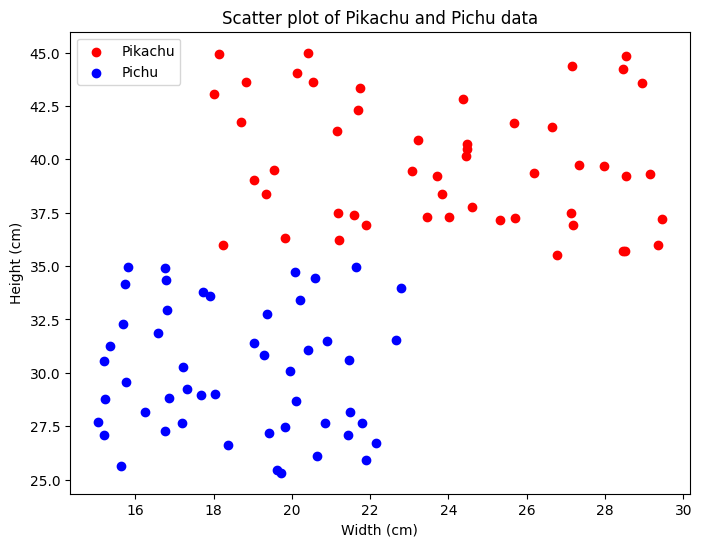

In [8]:
import matplotlib.pyplot as plt

# Funktion för att läsa in data från en textfil och returnera en lista med tuplar av x- och y-koordinater
def read_data(file_path):
    with open(file_path, "r") as file:
        lines = file.readlines()
        data = []
        for line in lines:
            coords = line.strip().split(",")
            coords = [float(coord.strip("()")) for coord in coords]
            data.append(tuple(coords))
    return data

# Läs in data för Pikachu och Pichu
pikachu_data = read_data(pikachu1_path)
pichu_data = read_data(pichu1_path)

# Extrahera bredd och höjd från tuplerna för Pikachu och Pichu
pikachu_widths, pikachu_heights = zip(*pikachu_data)
pichu_widths, pichu_heights = zip(*pichu_data)

# Plotta punkterna med olika färger i samma fönster
plt.figure(figsize=(8, 6))
plt.scatter(pikachu_widths, pikachu_heights, color='red', label='Pikachu')
plt.scatter(pichu_widths, pichu_heights, color='blue', label='Pichu')
plt.xlabel('Width (cm)')
plt.ylabel('Height (cm)')
plt.title('Scatter plot of Pikachu and Pichu data')
plt.legend()
plt.show()

In [5]:
import re

# Ange sökvägen till din textfil pichi.txt
testpoints_path = "../data/test_points.txt"  

# Öppna och läs in textfilen
with open(testpoints_path, "r") as file:
    raw_text = file.read()

# Skriv ut den råa texten
print(raw_text)

# Fixa mellanslag i texten
text_fixed_spacing = re.sub(r"\s+", " ", raw_text)

# Kaptalisera varje mening och splitta dem
text_list = [text.capitalize() for text in text_fixed_spacing.split(". ")]

# Sammanfoga meningarna med nya rader
cleaned_text = ".\n".join(text_list)

# Skriv ut den rensade texten
print()
print(cleaned_text)

# Öppna en ny txt-fil och skriv innehållet i cleaned_text
with open("../data/cleaned_test_points.txt", "w") as file:
    file.write(cleaned_text)

(25, 35), (15,14), (26,30), (22,45)

(25, 35), (15,14), (26,30), (22,45)


In [6]:
with open("../data/test_points.txt" , "r") as file:
    raw = file.read()

print (raw)

(25, 35), (15,14), (26,30), (22,45)


In [9]:
# Öppna en ny txt-fil och skriv innehållet i cleaned_text
with open("../data/cleaned_test_points.txt", "w") as file:
    file.write(cleaned_text)
import math

# Funktion för att läsa in testpunkter från en textfil
def read_test_points(testpoints_path):
    try:
        with open(testpoints_path, "r") as file:
            test_points = []
            for line in file:
                parts = line.strip().split(",")
                if len(parts) == 2:
                    x, y = map(float, parts)
                    test_points.append((x, y))
                else:
                    print("Felaktig rad i filen: ", line)
            return test_points
    except FileNotFoundError:
        print("Filen kunde inte hittas.")
        return []

# Funktion för att beräkna avståndet mellan två punkter i 2D-planet
def calculate_distance(point1, point2):
    x1, y1 = point1
    x2, y2 = point2
    distance = math.sqrt((x2 - x1)**2 + (y2 - y1)**2)
    return distance

# Funktion för att bestämma klassen för en testpunkt baserat på majoritetsklassen av de närmaste punkterna
def classify_point(test_point, all_points, k=5):
    distances = [(calculate_distance(test_point, point), point) for point in all_points]
    distances.sort()
    nearest_neighbors = [point for distance, point in distances[:k]]
    pichu_count = sum(1 for point in nearest_neighbors if point in pichu_data)
    pikachu_count = sum(1 for point in nearest_neighbors if point in pikachu_data)
    return "Pichu" if pichu_count > pikachu_count else "Pikachu"

# Läsa in testpunkter från en textfil
test_points = read_test_points(testpoints_path)

# Felhantering för tomma datafiler
if not test_points:
    print("Ingen data lästes in. Kont")

Felaktig rad i filen:  (25, 35), (15,14), (26,30), (22,45)
Ingen data lästes in. Kont


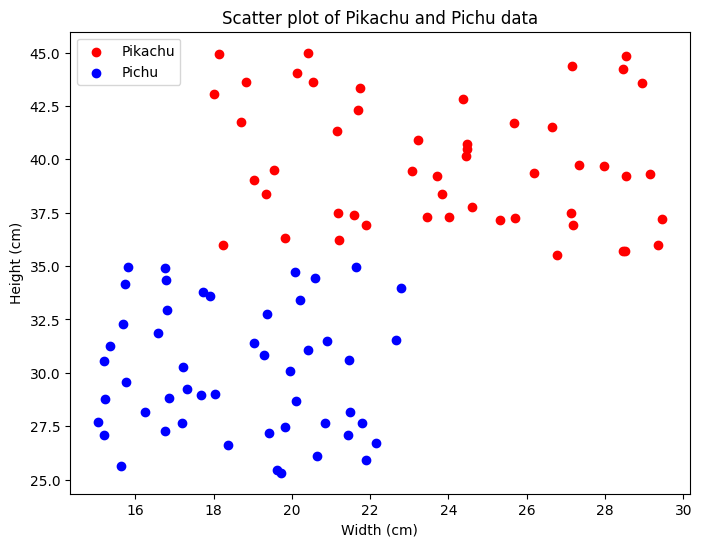

Felaktig rad i filen:  (25, 35), (15,14), (26,30), (22,45)
Ingen data lästes in. Kontrollera att datafiler finns2.


In [7]:
import re
import math
import matplotlib.pyplot as plt

# Funktion för att läsa in data från en textfil och returnera en lista med tuplar av x- och y-koordinater
def read_data(file_path):
    with open(file_path, "r") as file:
        lines = file.readlines()
        data = []
        for line in lines:
            coords = line.strip().split(",")
            coords = [float(coord.strip("()")) for coord in coords]
            data.append(tuple(coords))
    return data

# Ange sökvägarna till dina textfiler
pikachu1_path = "../data/pikachu1.txt"
pichu1_path = "../data/pichu1.txt"
testpoints_path = "../data/test_points.txt"
pichu1_data_path = "../data/pichu1_data.txt"
pikachu1_data_path = "../data/pikachu1_data.txt"

# Läs in data för Pikachu och Pichu från filer
try:
    pikachu_data = read_data(pikachu1_path)
    pichu_data = read_data(pichu1_path)
except FileNotFoundError:
    print("Filen kunde inte hittas. Kontrollera att datafiler finns1.")
    pikachu_data = []
    pichu_data = []

# Extrahera bredd och höjd från tuplerna för Pikachu och Pichu
pikachu_widths, pikachu_heights = zip(*pikachu_data)
pichu_widths, pichu_heights = zip(*pichu_data)

# Plotta punkterna med olika färger i samma fönster
plt.figure(figsize=(8, 6))
plt.scatter(pikachu_widths, pikachu_heights, color='red', label='Pikachu')
plt.scatter(pichu_widths, pichu_heights, color='blue', label='Pichu')
plt.xlabel('Width (cm)')
plt.ylabel('Height (cm)')
plt.title('Scatter plot of Pikachu and Pichu data')
plt.legend()
plt.show()

# Funktion för att läsa in testpunkter från en textfil
def read_test_points(testpoints_path):
    try:
        with open(testpoints_path, "r") as file:
            test_points = []
            for line in file:
                parts = line.strip().split(",")
                if len(parts) == 2:
                    x, y = map(float, parts)
                    test_points.append((x, y))
                else:
                    print("Felaktig rad i filen: ", line)
            return test_points
    except FileNotFoundError:
        print("Filen kunde inte hittas.")
        return []

# Läs in testpunkter från en textfil
test_points = read_test_points(testpoints_path)

# Felhantering för tomma datafiler
if not test_points:
    print("Ingen data lästes in. Kontrollera att datafiler finns2.")
else:
    # Låta användaren mata in en testpunkt
    while True:
        try:
            x = float(input("Ange x-koordinaten för testpunkten: "))
            y = float(input("Ange y-koordinaten för testpunkten: "))
            test_point = (x, y)
            break
        except ValueError:
            print("Felaktig inmatning. Ange numeriska värden för koordinaterna.")

    # Beräkna klassen för testpunkten
    class_result = classify_point(test_point, pichu_data + pikachu_data)

    # Skriva ut resultatet
    print(f"Testpunkten ({x}, {y}) klassificerades som: {class_result}")

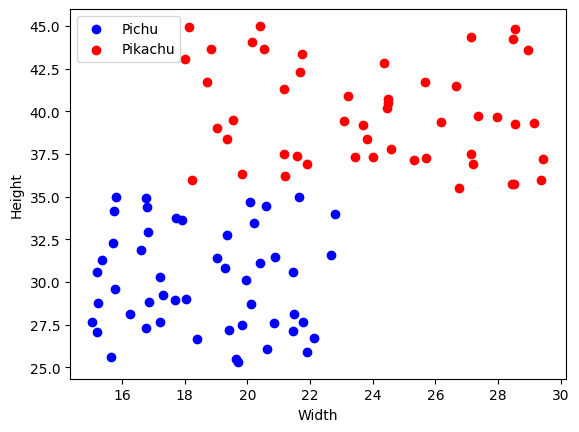

The test point is classified as: Pikachu


In [2]:
import numpy as np
import matplotlib.pyplot as plt

# loads the data from the .txt file
def load_data(filepath):
    data = []
    with open(filepath, 'r') as file:
        for line in file:
            try:
                # Strip potential parentheses and whitespace, then split by comma
                line = line.strip().replace('(', '').replace(')', '')
                width, height = map(float, line.split(','))
                data.append([width, height])
            except ValueError as e:
                print(f"Error on line: {line}. Error: {e}")
    return np.array(data)

# Load Pichu and Pikachu data
pichu_data = load_data('../data/pichu1.txt')  
pikachu_data = load_data('../data/pikachu1.txt')  

# This function is used to plot Pichu and Pikachu data points in different colors
def plot_data(pichu, pikachu):
    plt.scatter(pichu[:, 0], pichu[:, 1], c='blue', label='Pichu')
    plt.scatter(pikachu[:, 0], pikachu[:, 1], c='red', label='Pikachu')
    plt.xlabel('Width')
    plt.ylabel('Height')
    plt.legend()
    plt.show()

plot_data(pichu_data, pikachu_data)

# This function prompts the user for a test point and handles invalid input
def input_test_point():
    while True:
        try:
            width = float(input("Enter width: "))
            height = float(input("Enter height: "))
            if width < 0 or height < 0:
                raise ValueError("Dimensions must be non-negative.")
            return np.array([width, height])
        except ValueError as e:
            print(f"Invalid input: {e}. Please enter positive numeric values.")


# This function calculates the Euclidean distance between two points
def calculate_distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2) ** 2))

# This function is used to determine the nearest points
def classify_test_point(training_data, test_point, k=5):
    distances = np.array([calculate_distance(test_point, data_point) for data_point in training_data])
    # Find the k nearest points
    nearest_indices = np.argsort(distances)[:k]
    pichu_count = np.sum(nearest_indices < len(pichu_data))
    pikachu_count = k - pichu_count
    return 'Pichu' if pichu_count > pikachu_count else 'Pikachu'

# Combining Pichu and Pikachu data for the classification
combined_data = np.vstack((pichu_data, pikachu_data))


# Input a test point
test_point = input_test_point()

# Classify the test point
classification_result = classify_test_point(combined_data, test_point)
print(f"The test point is classified as: {classification_result}")